In [1]:
from src.arithmetic_pipeline import ArithmeticPipeline
import plotly.graph_objects as go
import random

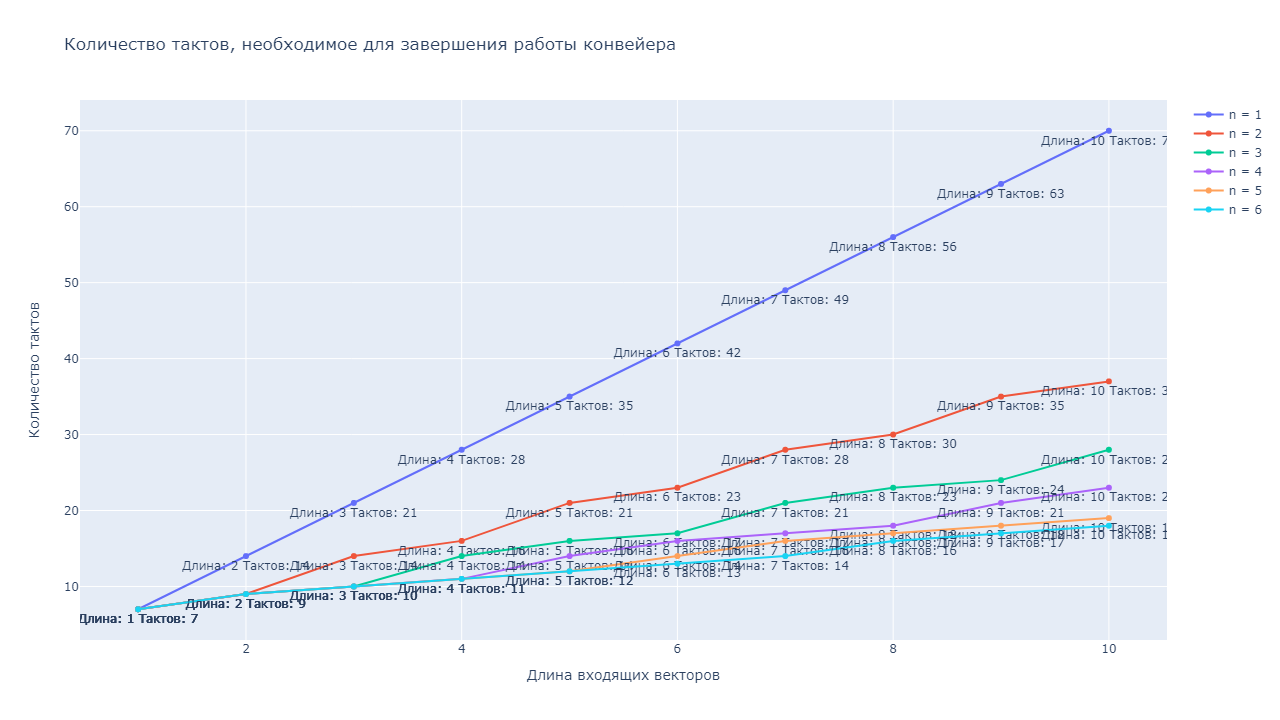

In [14]:
# Tacts amount dependency on amount of numbers in vectors
# with amount of stages n = 1, 2, 3, 4, 5, 6
x_vectors = []
y_vectors = []
for i in range(1, 7):
    x_vector = []
    y_vector = []
    for j in range(1, 11):
        vector_1 = [random.randint(0, 63) for _ in range(j)]
        vector_2 = [random.randint(0, 63) for _ in range(j)]
        pipeline = ArithmeticPipeline(vector_1, vector_2, i, 6)
        while pipeline.is_busy:
            pipeline.tact()
        x_vector.append(j)
        y_vector.append(pipeline.status['tacts_done'])
    x_vectors.append(x_vector)
    y_vectors.append(y_vector)

fig = go.Figure()
i = 1
for x, y in list(zip(x_vectors, y_vectors)):
    fig.add_trace(
        go.Scatter(x=x, y=y, mode='lines+markers+text', name=f'n = {i}',
                   text=[f'Длина: {len} Тактов: {tct}' for len, tct in list(zip(x, y))],
                   textposition='bottom center',
                   )
    )
    i += 1
fig.update_layout(title_text='Количество тактов, необходимое для завершения работы конвейера',
                  )
fig.update_xaxes(title_text='Длина входящих векторов')
fig.update_yaxes(title_text='Количество тактов')
fig.show(width=1280, height=720, autosize=True, renderer='png')